In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plots

In [3]:
def get_metrics_from_multi_columns(data, metric_name, runs):
    metrics_columns = [(f"run_{r}", metric_name ) for r in runs]
    data_metric = data[metrics_columns]
    data_metric.columns = [metric_name + f"_{i}" for i in runs]
    return data_metric

In [4]:
def plot_metric(all_results,metric, l ):
    plt.figure()
    plt.plot(range(8), all_results["bootstrap_mean"],"--")
    plt.fill_between(x = range(8),
                     y1 = (all_results["bootstrap_mean"]-all_results["bootstrap_std"]).values,
                     y2 = (all_results["bootstrap_mean"]+all_results["bootstrap_std"]).values,
                     alpha = 0.2)

    plt.plot(range(8), all_results["marginal_mean"],"--")
    plt.fill_between(x = range(8),
                     y1 = (all_results["marginal_mean"]-all_results["marginal_std"]).values,
                     y2 = (all_results["marginal_mean"]+all_results["marginal_std"]).values,
                     alpha = 0.2)
    plt.xlabel("t")
    plt.ylabel(metric_symbol[metric])
    plt.title(f"{metric}, λ= {l}")
    plt.show()
    plt.close()


In [5]:
def results_metrics(marginal_results,bootstrap_results, metric_name, runs):
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = metric_name,
                                                   runs=runs)

    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        f"bootstrap_mean":bootstrap_mean,
        f"bootstrap_std":bootstrap_std,
        f"marginal_mean":marginal_mean,
        f"marginal_std":marginal_std,

    }
    return pd.DataFrame(all_results)

In [6]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    ax1.plot(range(eval_loss.shape[0]), eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(range(eval_loss.shape[0]), eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Total Utility T")
    ax1.set(xlabel='t', ylabel='T')
    ax1.legend()

    # plot utility
    ax2.plot(range(eval_utility.shape[0]), eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(range(eval_utility.shape[0]), eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.set(xlabel='t', ylabel='U')
    ax2.legend()

    # fairness
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.set(xlabel='t', ylabel='F')
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [7]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    x = range(eval_loss["bootstrap_mean"].shape[0])
    ax1.plot(x, eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(x, eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Total Utility T")
    ax1.legend()

    # plot utility
    ax2.plot(x, eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(x, eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.legend()

    # fairness
    ax3.plot(x, eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(x, eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [8]:
ls = [0.5]
exp_name = "exp_compass_tests"
exp_number = "test_2_shuffle_lr_01_iter_1500_adam"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
data_path = base_path + "/my_code/Bayesian-fairness/data"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"

lr:1.0 iterations: 500 shuffle:False


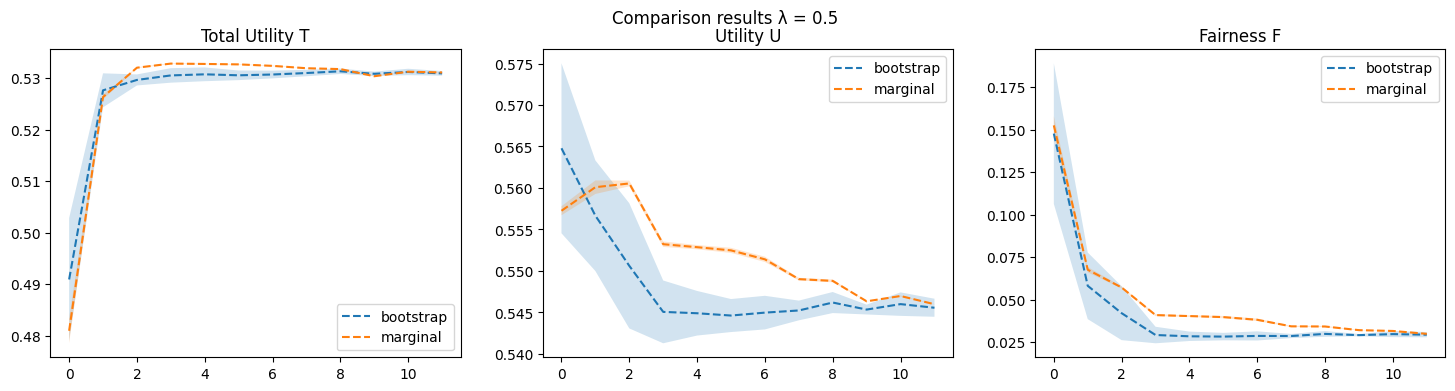

lr:1.0 iterations: 1500 shuffle:False


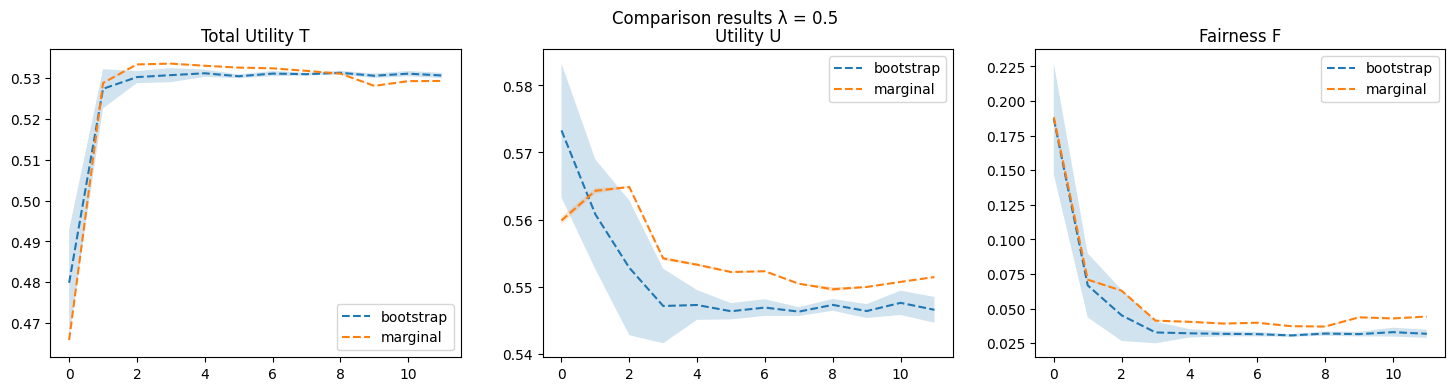

lr:0.1 iterations: 500 shuffle:False


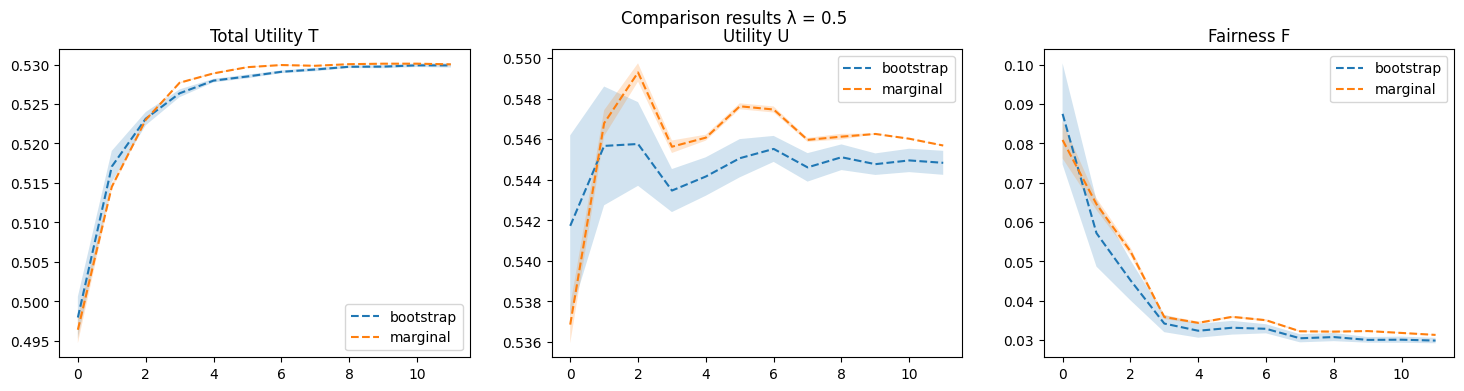

lr:0.1 iterations: 1500 shuffle:False


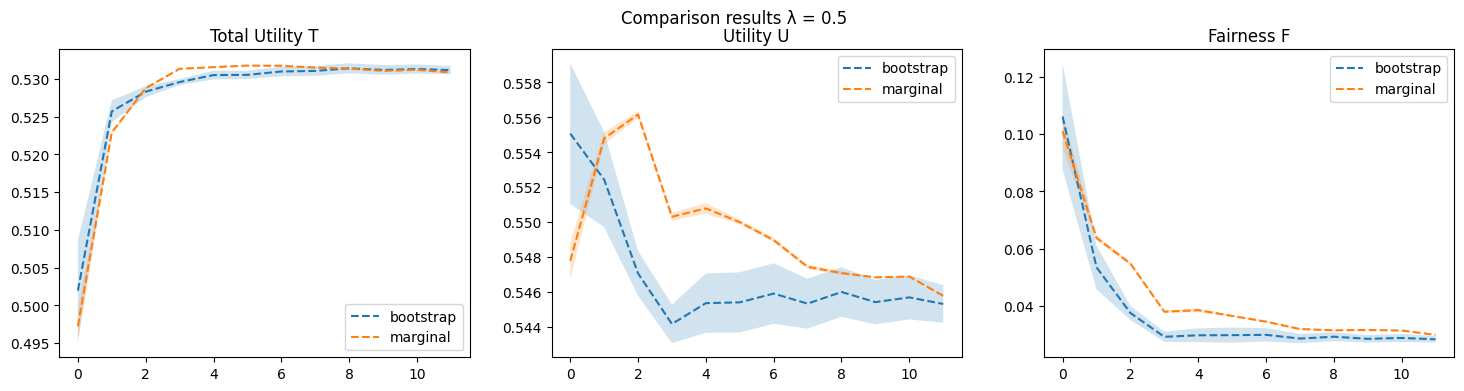

lr:1.0 iterations: 500 shuffle:True


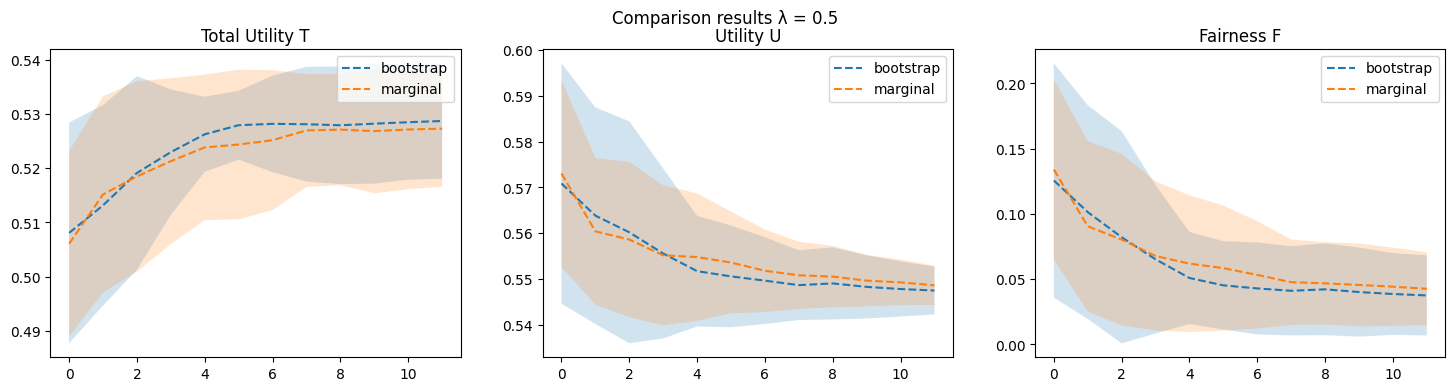

lr:1.0 iterations: 1500 shuffle:True


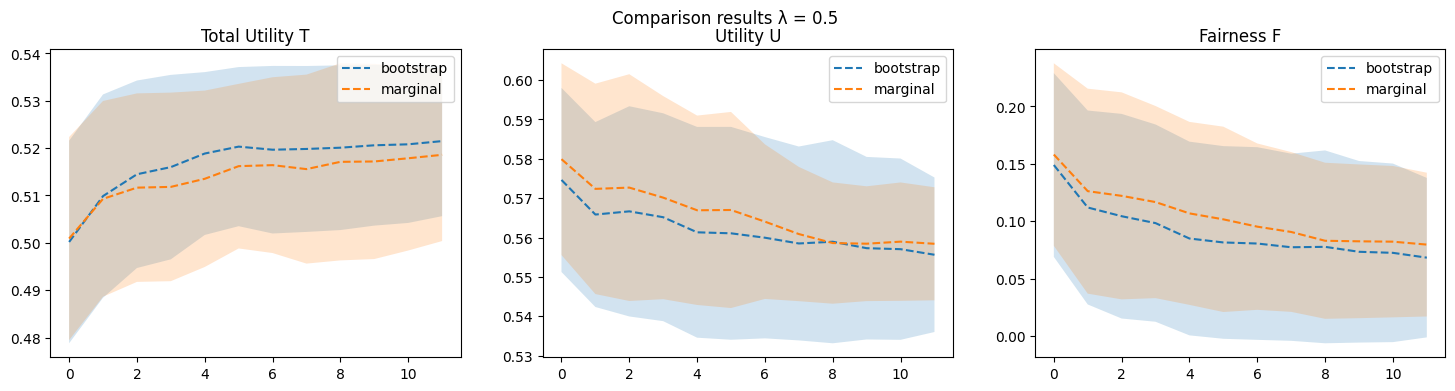

lr:0.1 iterations: 500 shuffle:True


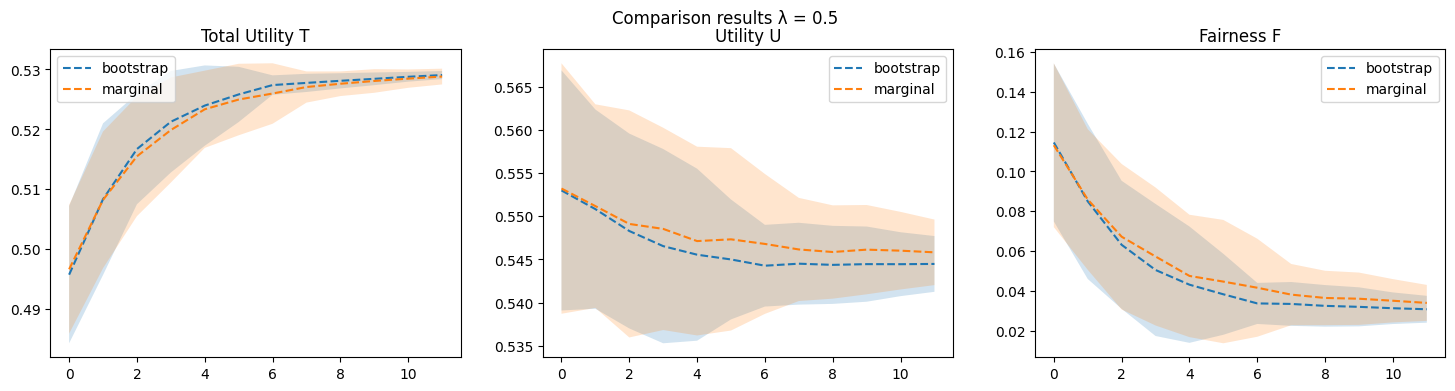

lr:0.1 iterations: 1500 shuffle:True


FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_compass_hyperparameter_tuning/adam_lr_0.1_iter_1500_s_True/l_0.5/boostrap_results_all.csv'

In [16]:
exp_name = "exp_compass_hyperparameter_tuning"
for shuffle in [False, True]:
    for lr in [1.0, 0.1]:
        for iter_num in [500, 1500]:
            exp_number = f"adam_lr_{lr}_iter_{iter_num}_s_{shuffle}"
            results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"
            print(f"lr:{lr} iterations: {iter_num} shuffle:{shuffle}")
            runs = range(20) 
            for l in ls :
                bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
                marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])

                eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                            marginal_results=marginal_results,
                                            metric_name="eval_loss",
                                            runs=runs)


                eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                                marginal_results=marginal_results,
                                                metric_name="eval_utility",
                                                runs=runs)

                eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                                marginal_results=marginal_results,
                                                metric_name="eval_fairness_loss",
                                                runs=runs)

                subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )


lr:1.0 iterations: 500 shuffle:False


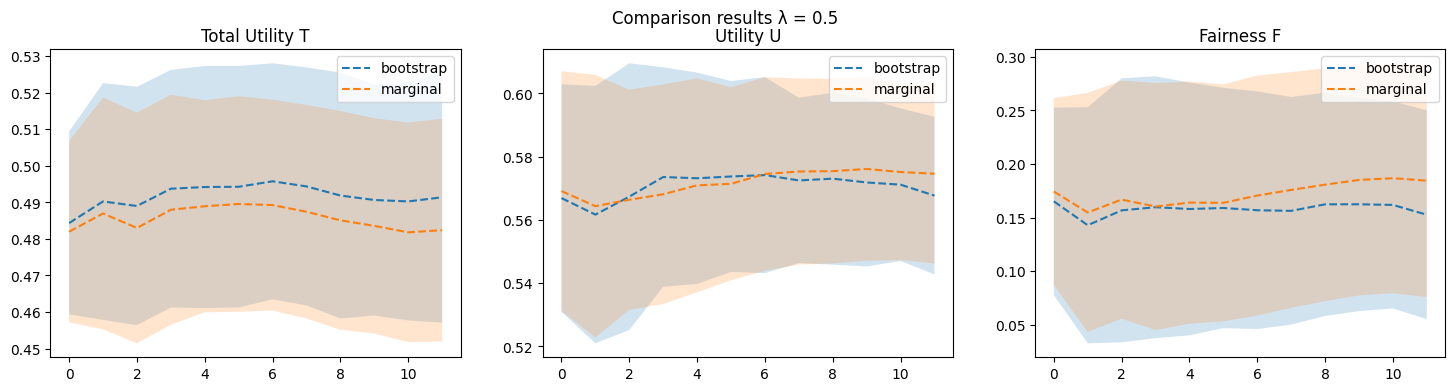

lr:1.0 iterations: 1500 shuffle:False


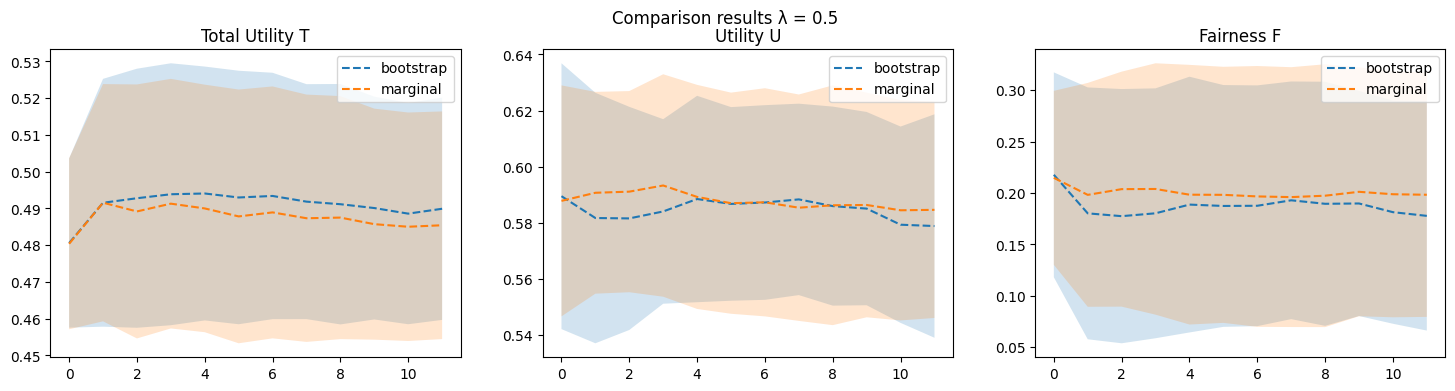

lr:0.1 iterations: 500 shuffle:False


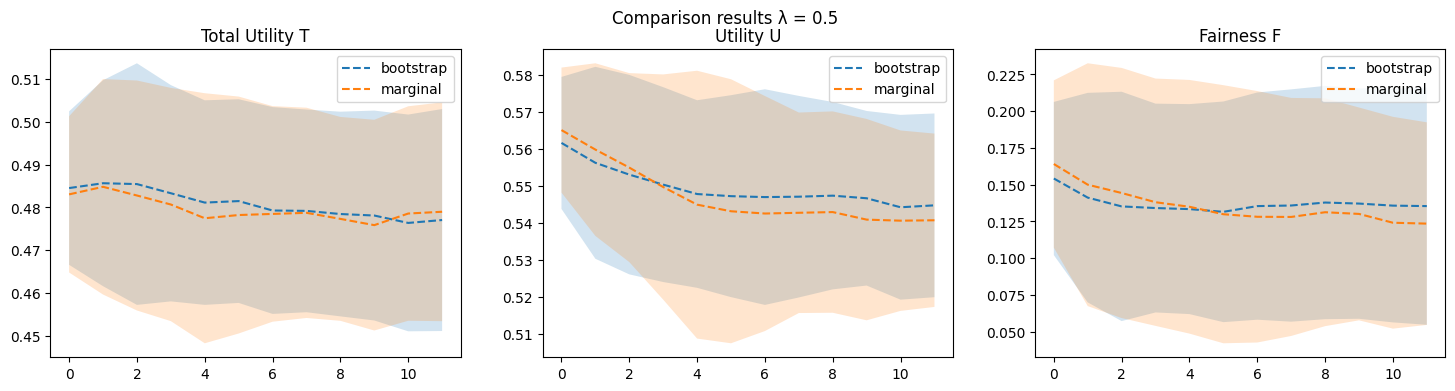

lr:0.1 iterations: 1500 shuffle:False


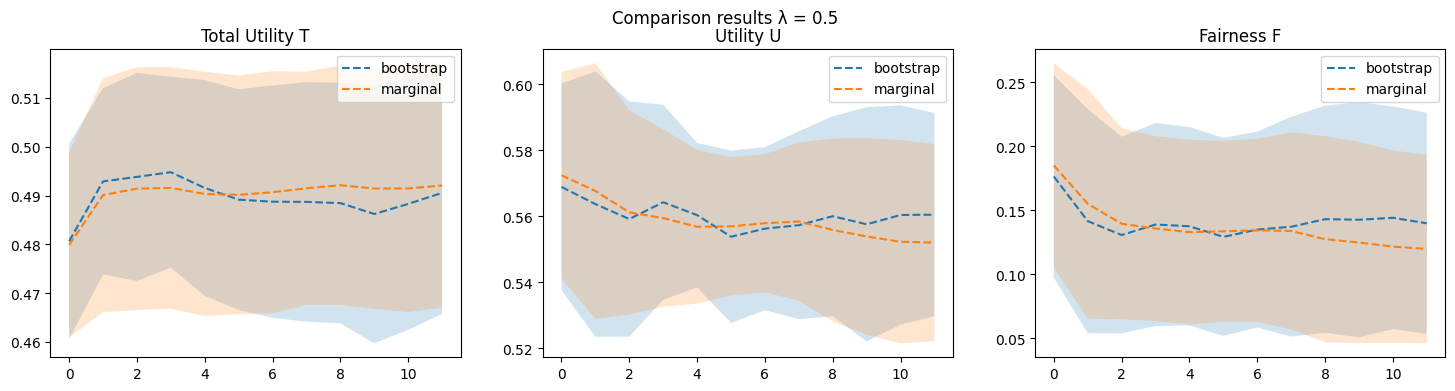

lr:1.0 iterations: 500 shuffle:True


FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/seq_exp_compass_hyperparameter_tuning/adam_lr_1.0_iter_500_s_True/l_0.5/boostrap_results_all.csv'

In [15]:
exp_name = "seq_exp_compass_hyperparameter_tuning"
for shuffle in [False, True]:
    for lr in [1.0, 0.1]:
        for iter_num in [500, 1500]:
            exp_number = f"adam_lr_{lr}_iter_{iter_num}_s_{shuffle}"
            results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"
            print(f"lr:{lr} iterations: {iter_num} shuffle:{shuffle}")
            runs = range(20) 
            for l in ls :
                bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
                marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])

                eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                            marginal_results=marginal_results,
                                            metric_name="eval_loss",
                                            runs=runs)


                eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                                marginal_results=marginal_results,
                                                metric_name="eval_utility",
                                                runs=runs)

                eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                                marginal_results=marginal_results,
                                                metric_name="eval_fairness_loss",
                                                runs=runs)

                subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )


In [10]:
bootstrap_results

run_0                                                      \
   fairness_loss   utility      loss eval_fairness_loss eval_utility   
0       0.144104  0.585150 -0.513098           0.208758     0.587770   
1       0.105801  0.568221 -0.515321           0.118882     0.570123   
2       0.128674  0.589692 -0.525355           0.187103     0.588383   
3       0.066290  0.555651 -0.522506           0.093445     0.563205   
4       0.033293  0.545574 -0.528927           0.053446     0.553810   
5       0.029490  0.548741 -0.533996           0.039855     0.549290   
6       0.027685  0.543537 -0.529695           0.035674     0.548257   
7       0.019631  0.562520 -0.552704           0.035866     0.548720   
8       0.013631  0.560259 -0.553444           0.030681     0.545880   
9       0.012017  0.556745 -0.550737           0.028689     0.544782   
10      0.009704  0.540462 -0.535610           0.029365     0.545221   
11      0.012739  0.558661 -0.552291           0.030908     0.546161   

                     run_1                                         ...  \
   eval_loss fairness_loss   utility      loss eval_fairness_loss  ...   
0   0.483391      0.089204  0.580175 -0.535573           0.124983  ...   
1   0.510682      0.047697  0.565307 -0.541459           0.038902  ...   
2   0.494831      0.024743  0.553574 -0.541203           0.030605  ...   
3   0.516483      0.018331  0.542997 -0.533832           0.026908  ...   
4   0.527087      0.020360  0.544116 -0.533936           0.026170  ...   
5   0.529362      0.011144  0.563624 -0.558052           0.025709  ...   
6   0.530420      0.010059  0.541376 -0.536347           0.025452  ...   
7   0.530787      0.015148  0.569865 -0.562291           0.025078  ...   
8   0.530539      0.009411  0.555127 -0.550421           0.024976  ...   
9   0.530438      0.011070  0.542586 -0.537051           0.024839  ...   
10  0.530539      0.010092  0.551104 -0.546058           0.024725  ...   
11  0.530707      0.007334  0.539443 -0.535775           0.024737  ...   

       run_8                                                   run_9  \
        loss eval_fairness_loss eval_utility eval_loss fairness_loss   
0  -0.549382           0.202578     0.585981  0.484692      0.130470   
1  -0.556623           0.161292     0.578876  0.498230      0.041478   
2  -0.564896           0.091451     0.565167  0.519441      0.032228   
3  -0.539129           0.094648     0.567292  0.519968      0.027236   
4  -0.540856           0.094146     0.566232  0.519159      0.027643   
5  -0.544768           0.096801     0.565387  0.516986      0.017132   
6  -0.541123           0.088400     0.565009  0.520809      0.024864   
7  -0.568452           0.093954     0.567991  0.521014      0.023861   
8  -0.536388           0.096586     0.569115  0.520822      0.029036   
9  -0.539190           0.096064     0.567436  0.519404      0.018776   
10 -0.555812           0.087899     0.565565  0.521615      0.017950   
11 -0.543787           0.084589     0.565083  0.522788      0.018853   

                                                                  
     utility      loss eval_fairness_loss eval_utility eval_loss  
0   0.550013 -0.484778           0.113312     0.560234  0.503577  
1   0.539497 -0.518759           0.043296     0.547460  0.525812  
2   0.572755 -0.556641           0.044356     0.549475  0.527297  
3   0.543555 -0.529937           0.045145     0.551995  0.529423  
4   0.555664 -0.541842           0.047445     0.552944  0.529222  
5   0.540852 -0.532286           0.034107     0.547882  0.530829  
6   0.551261 -0.538829           0.038965     0.550639  0.531157  
7   0.552096 -0.540166           0.038424     0.550600  0.531387  
8   0.557601 -0.543083           0.039458     0.550768  0.531039  
9   0.554636 -0.545248           0.038492     0.550529  0.531283  
10  0.549896 -0.540921           0.030694     0.545759  0.530412  
11  0.552546 -0.543120           0.029180     0.544752  0.530162  

[12 rows x 60 col

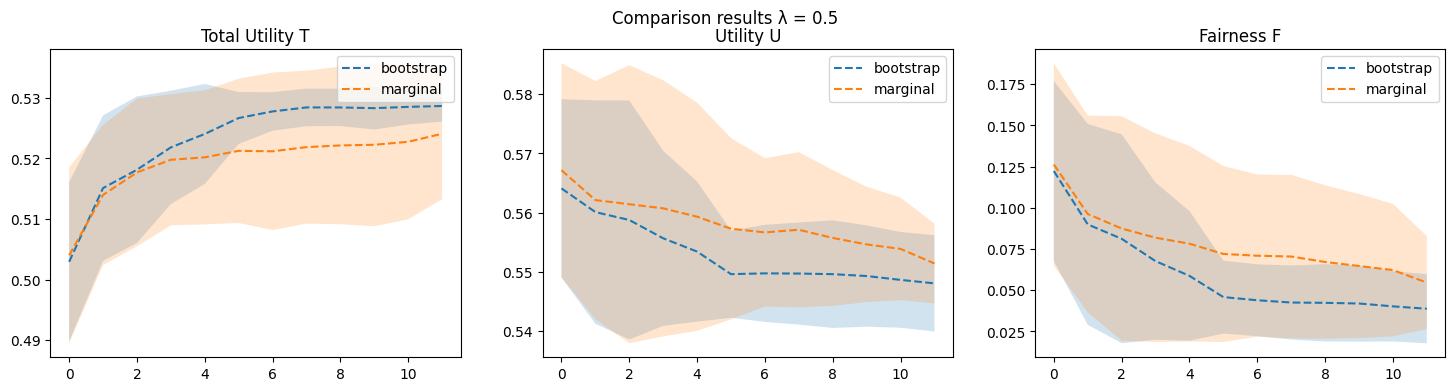

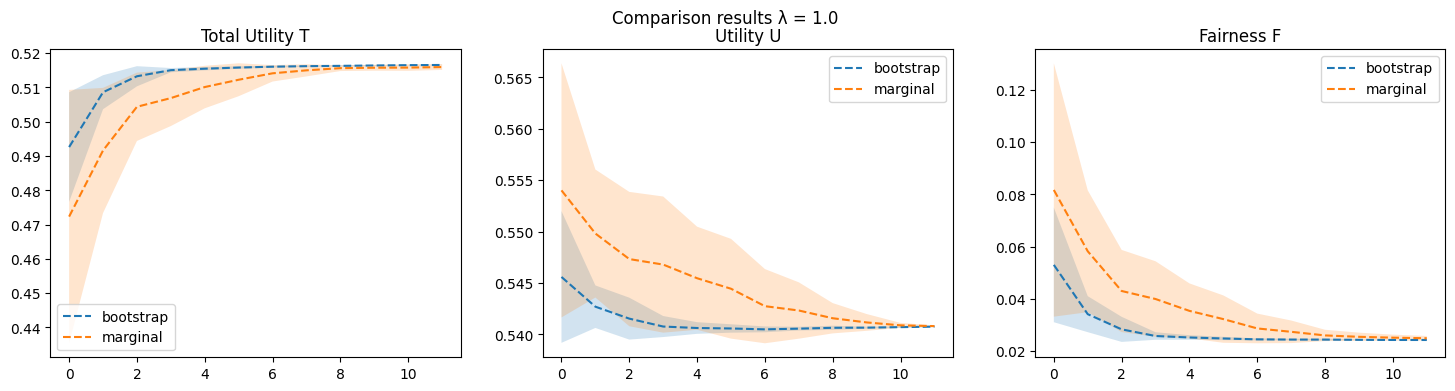

In [20]:
runs = range(20) 
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

In [15]:
[0.0,0.4,6.0]

[0.0, 0.4, 6.0]

In [71]:
plt.rcParams.update({'font.size': 12})

In [72]:
runs = range(100)
l_results = []
ls = [0.0, 0.5, 1.0]
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    l_results += [[eval_loss,eval_utility,eval_fainress]]

In [73]:
l_results[0][0].shape[0]

12

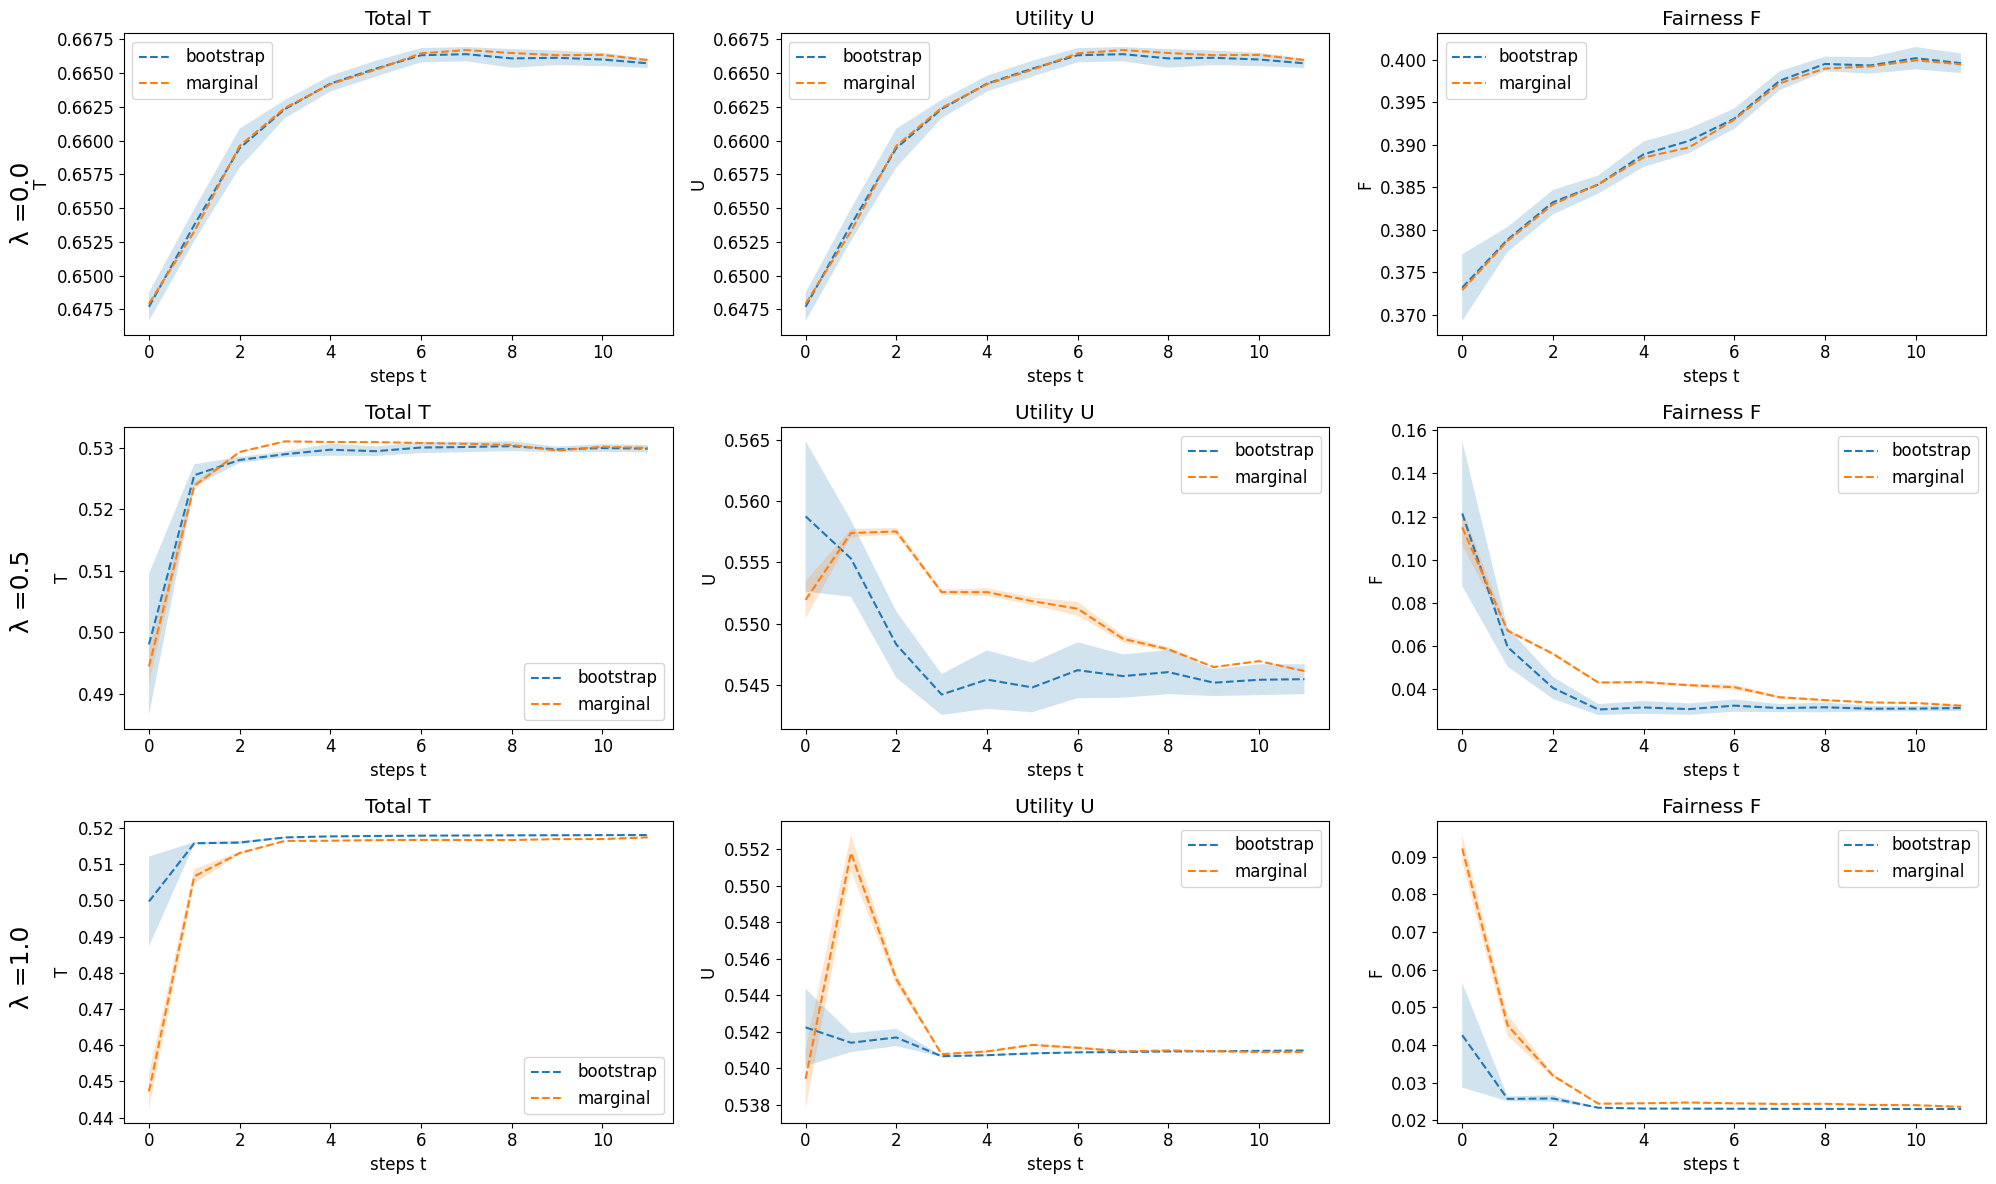

In [82]:
subplots_comparison_paper(ls=ls, losses_list=l_results, save_path=results_path)

In [81]:
def subplots_comparison_paper(ls, losses_list, save_path):
    fig, axes = plt.subplots(3, 3, figsize=(20, 12))
    
    fig.text(0.003, 1/6 - 0.01, f'λ ={ls[2]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 1/3 + 1/6 - 0.03, f'λ ={ls[1]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 2/3 + 1/6 - 0.04, f'λ ={ls[0]}', rotation='vertical', fontsize = 18)
    
    for l, ax, losses in zip(ls, axes, losses_list):
        # plot total
        x = range(losses[0]["bootstrap_mean"].shape[0])
        ax[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                         y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                         y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                         alpha = 0.2)
        ax[0].set_title("Total T")
        ax[0].set(xlabel='steps t')
        ax[0].set_ylabel(f'T')
        ax[0].legend()

        # plot utility
        ax[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                         y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                         y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                         alpha = 0.2)
        ax[1].set_title("Utility U")
        ax[1].set(xlabel='steps t', ylabel='U')
        ax[1].legend()

        # fairness
        ax[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
        ax[2].fill_between(x =x,
                         y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                         y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                         y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                         alpha = 0.2)
        ax[2].set_title("Fairness F")
        ax[2].set(xlabel='steps t', ylabel='F')
        ax[2].legend()
#         ax.suptitle(f"Comparison results λ = {l}")
#     fig.suptitle(f"Comparison results for different λ parameter")
    plt.tight_layout()
    fig.subplots_adjust(left=0.06)
    fig.savefig(save_path + f"/plots/comparison_subplots_paper.png")
    plt.show()
    plt.close()

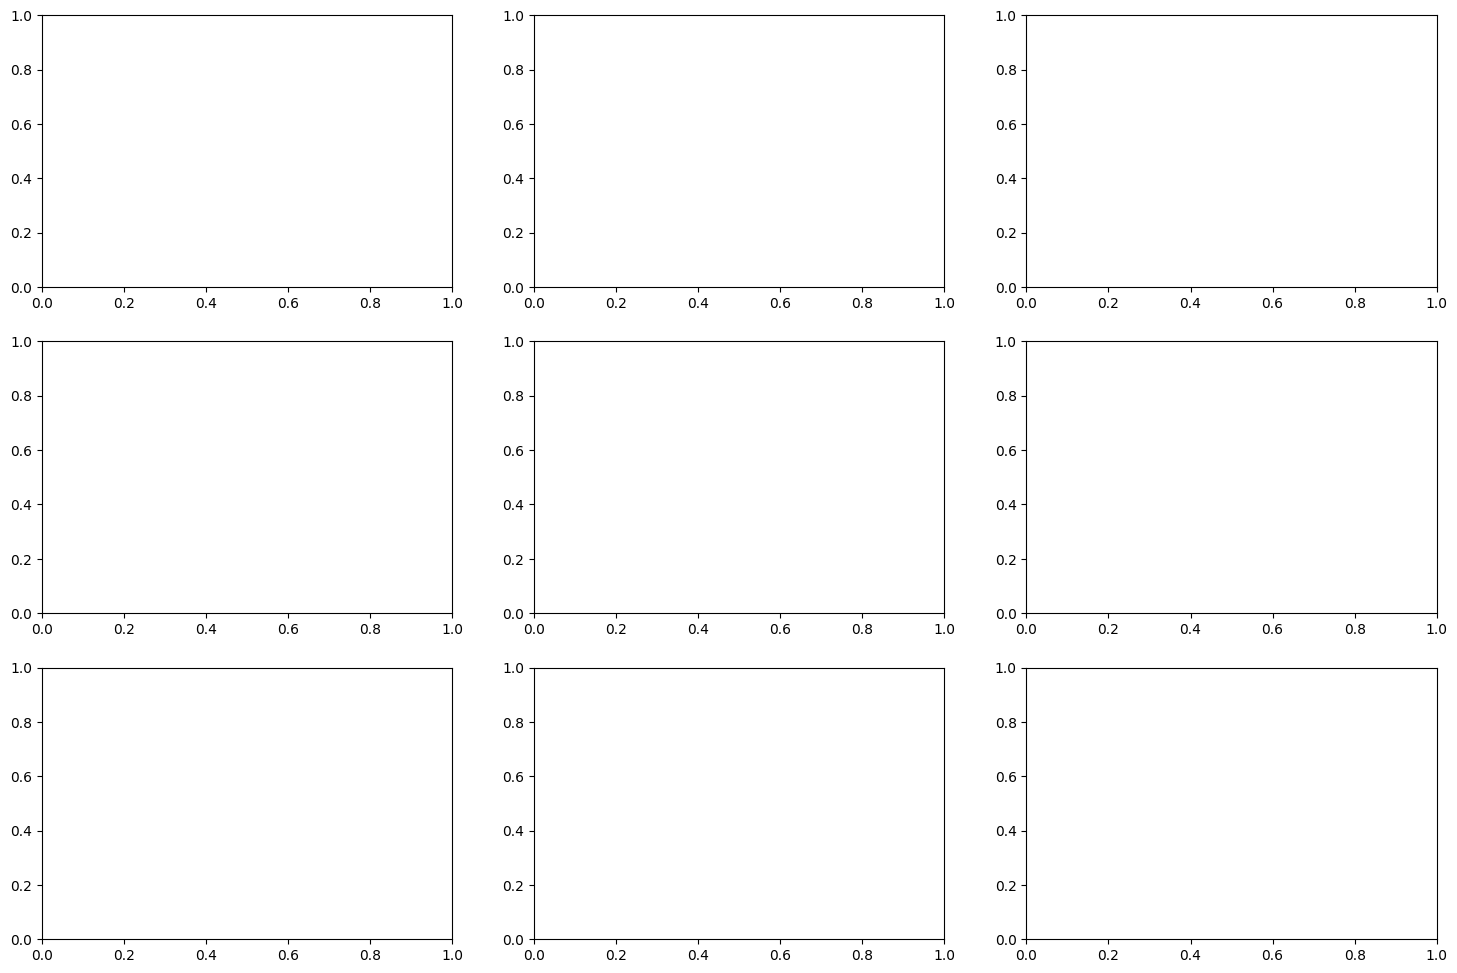

In [21]:
ls = [0.0, 0.4, 0.5]
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

In [39]:
axes

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

In [43]:
for l, ax, losses in zip(ls, axes, l_results):
    print(l)
    print(ax)


0.0
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.4
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.5
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


In [45]:
losses[0]

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.498035,0.011488,0.494452,0.002819
1,0.525584,0.001784,0.523854,0.000571
2,0.528064,0.000488,0.529366,0.000120
3,0.528996,0.000476,0.531090,0.000055
4,0.529731,0.000971,0.530989,0.000032
5,0.529490,0.000789,0.530968,0.000037
6,0.530085,0.000913,0.530823,0.000071
7,0.530178,0.000853,0.530696,0.000028
8,0.530311,0.000798,0.530507,0.000036
9,0.529781,0.000465,0.529595,0.000010
